#  Table of content
# 1.0 Intoduction
# 2.0 Importation of Data and Dependence
# 3.0 Data description
# 4.0 Data Cleaning
# 5.0 Checking Stationary Trend in Data
# 6.0 Differencing
# 7.0 Applying ARIMA Algorithm on Data
# 8.0 Applying SARIMAX Algorithm on Data
# 9.0 Doing Prediction for future data
# 10.0 Conclusion

# 1.0 Intoduction

This project aims to forecast future sales for a given product based on historical sales data. This project will be helpful for businesses looking to optimize their inventory management, pricing strategies, and overall sales performance.

# 2.0 Importion of  the data and Dependence

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\USER\Videos\New folder (8)\New folder\udemy\3.perrin-freres-monthly-champagne-.csv')

# 3.0 Data description

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.shape

(107, 2)

# 4.0 Cleaning up the data

In [6]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [11]:
df.drop(105,axis=0,inplace=True)

In [12]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df.dtypes

Month     object
Sales    float64
dtype: object

### Convert Month into Datetime

In [14]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


i have to set my index to month

In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


Now, i need the statistics of this data

In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# 5.0 Checking Stationary Trend in Data

In this session, I'll visualize your sales column in this lesson and determine whether the data is stationary or not.

### Visualization of the Data

<AxesSubplot:xlabel='Month'>

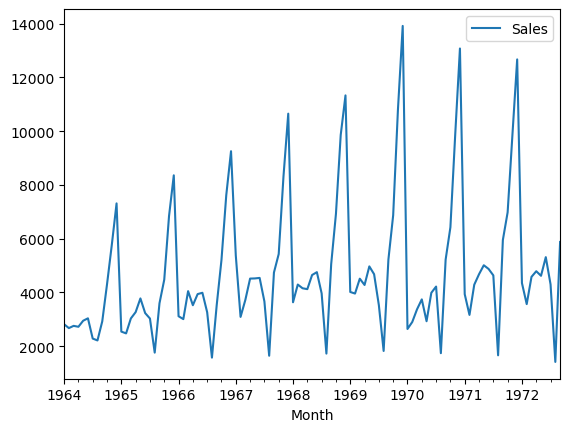

In [19]:
df.plot()

looking this graph,we can say this data is seasonal. 
Seasonal sales are sales which increase rapidly  at a specific time in a year and later goes back to normal.
Now, stationarity is no more in the data because i have seasonality in my data.
Now, i have to do a stasticial  test to check whether there is stationarity in the data

### Testing For Stationarity

In [20]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [21]:
test_result=adfuller(df['Sales'])

Adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']. 
 The most important is p-value.
 This is almost similar to Hypothesis testing, whereas Null hypo which says Data is not Stationery
 whereas Alternate hypo says data is stationery



If P-value < 0.05, we reject Null hypo i.e alternate hypo is true, i.e data is stationery

In [22]:

#zip basically combines result,labels

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [23]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276226
p-value : 0.3639157716602452
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


My probability value(P-value) is greater than 0.05, it means it has non-stationarity in data.

My Data must be stationary. If my data is non-stationery, i've to make it stationery using various techniques such as Differencing & many more

# 6.0 Differencing

Problem Statement:
1. How to make my data stationary using concept of differencing...

In [24]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [25]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [26]:
df['Sales'].shift()

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [27]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [28]:
df['Sales'] - df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 105, dtype: float64

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df['Sales First Difference']

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales First Difference, Length: 105, dtype: float64

In [31]:
# why taken shift(12),because basically year has 12 month cycle
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [32]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [33]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo, 
i.e data is stationery. 
If p-value is almost 0,then we have a wonderful stationery graph

<AxesSubplot:xlabel='Month'>

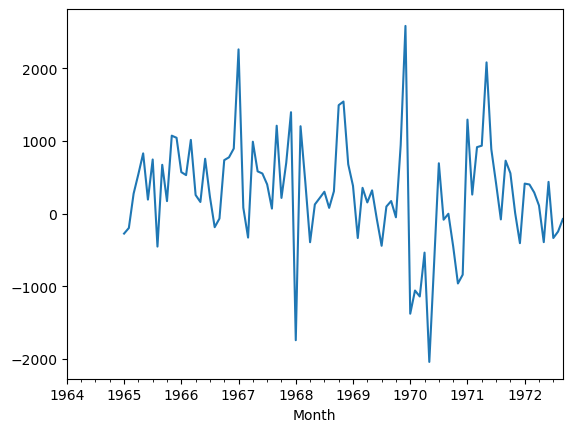

In [34]:
df['Seasonal First Difference'].plot()

Now, the trend above is almost close to stationary trend. If the p-value gets almost close to 0, in such case you will get stationary graph.

Now my data is ready for modelling purpose.

# 7.0 Applying ARIMA Algorithm on Data

In [35]:
## ARIMA--AR + I + MA
## (p,d,q)
## p- pacf graph
## d=1
## q= acf graph

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

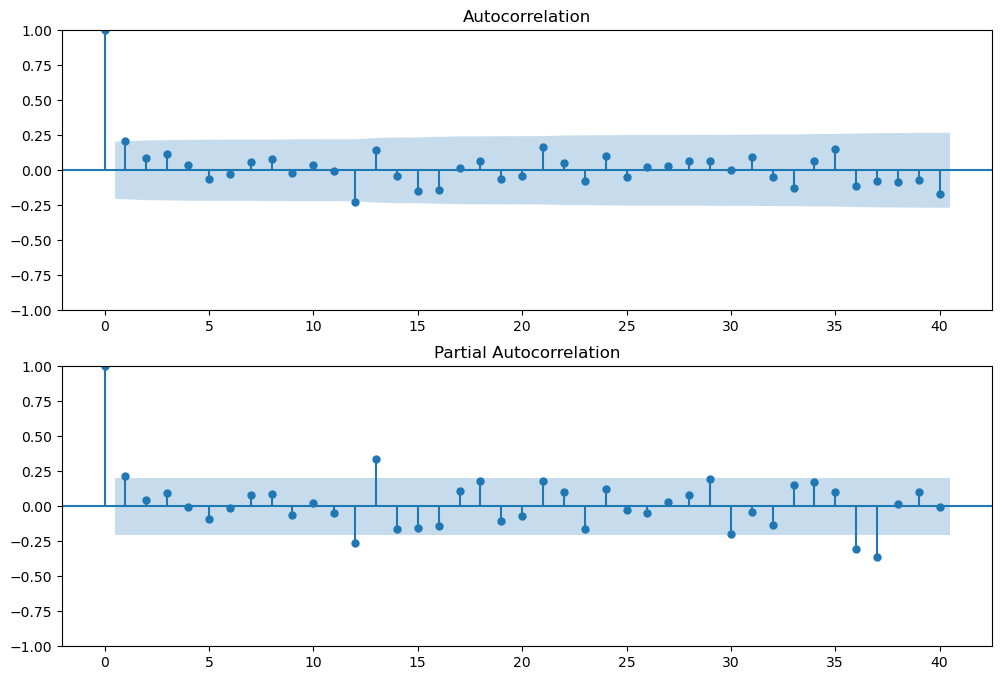

In [38]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [39]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 31 Mar 2023   AIC                           1911.627
Time:                        11:56:13   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

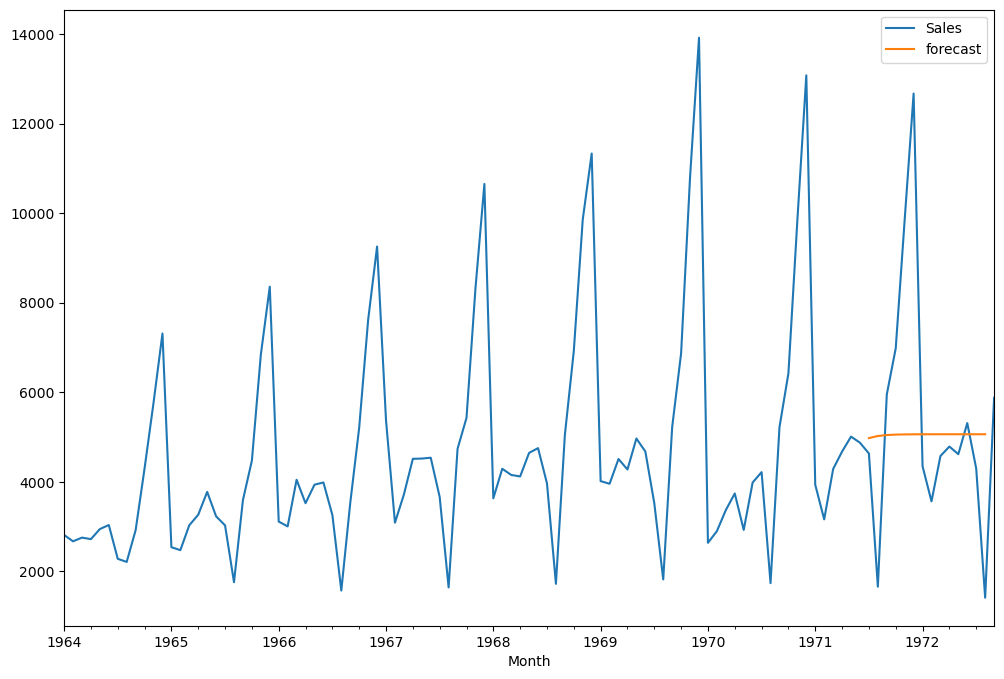

In [42]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

#### note: when u have seasonal data ARIMA model will not work, use SARIMAX model.

# 8.0 Applying SARIMAX Algorithm on data

In [44]:
import statsmodels.api as sm

In [45]:
#seasonal_order=(1,1,1,12)
#(p,d,q,shift_value)
#(shift value is 12 because i have 12 months because its seasonal)

In [46]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
#predicting from index 90 to 103
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)


<AxesSubplot:xlabel='Month'>

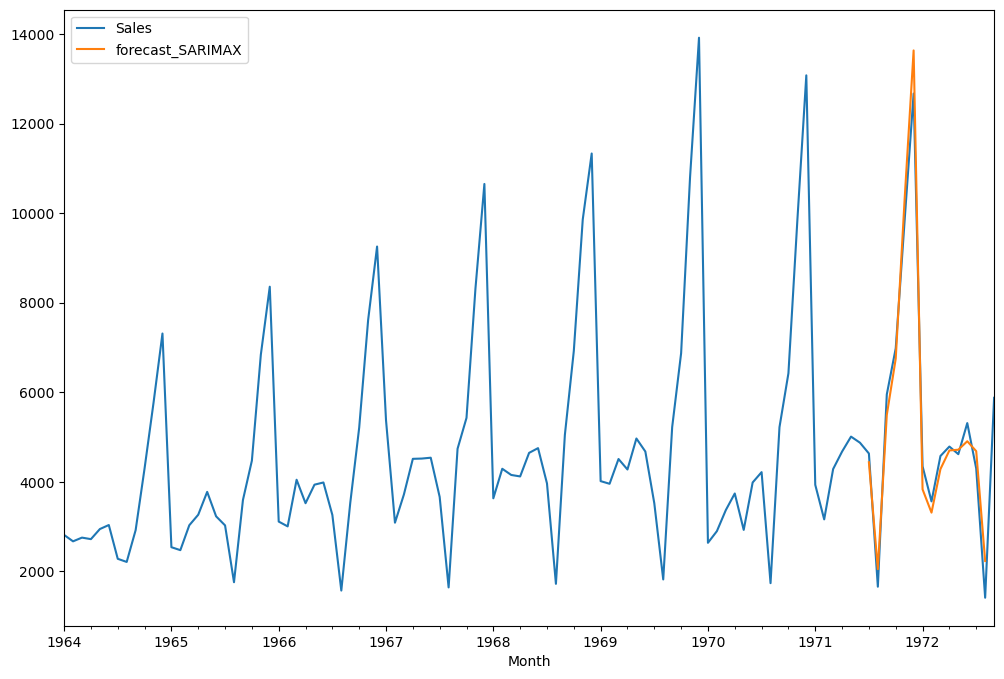

In [48]:
#blue line is original data anf orange is a forecasted data
df[['Sales', 'forecast_SARIMAX']].plot(figsize=(12, 8))

# 9.0 Doing predictions for Future date

#### To see how future predictions/projections looks like

In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [51]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [52]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [53]:
from pandas.tseries.offsets import DateOffset

#creating additional dataset for 24 months,
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [54]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [55]:
future_dateset_df

,Sales,Sales First Difference,Seasonal First Difference,forecast,forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [56]:
future_dateset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [57]:
future_df=pd.concat([df,future_dateset_df])

In [58]:
#then we can see future predictions

<AxesSubplot:>

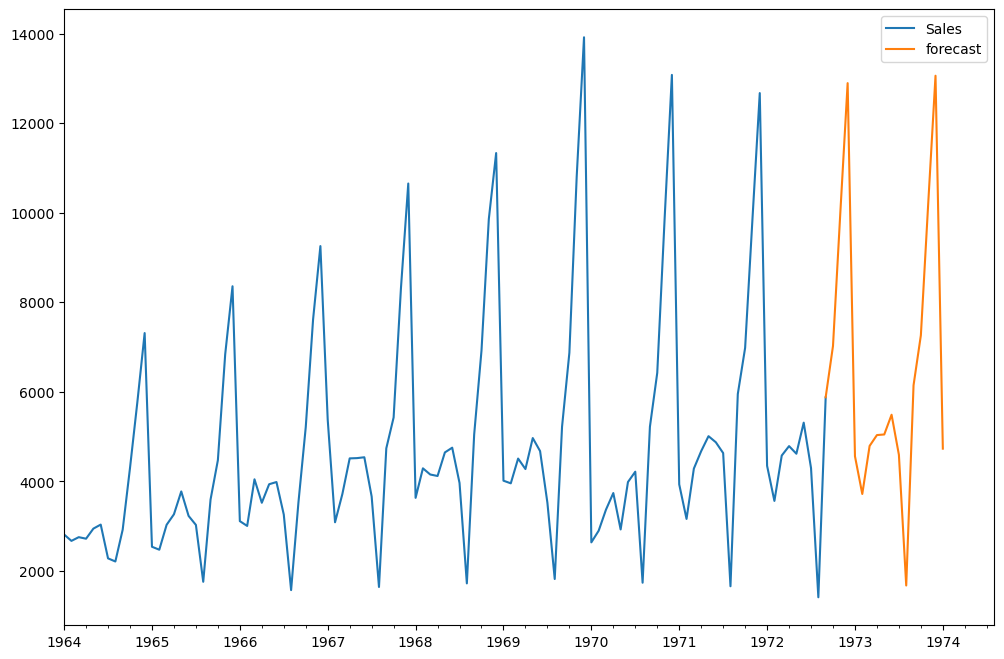

In [59]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

# 10.0 Conclusion

In conclusion, the product is seasonal, and the forecast assists in predicting the sales in the future to help gain insight into the demand patterns and change their inventory and pricing strategy appropriately.